<a href="https://colab.research.google.com/github/GinuraAdikari/BankChurn/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLcw/bank-additional-full.csv', sep=';')

# Display the first few rows
print(data.head())
print(data.info())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:

print("Shape of the dataset:", data.shape)

Shape of the dataset: (41188, 21)


In [3]:
data.duplicated().sum()

12

In [4]:
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [5]:
data.drop_duplicates(keep='first', inplace=True)

In [10]:
# Summary statistics for numerical and categorical columns
data.describe()  # Numerical features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.describe(include='object')  # Categorical features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [12]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [13]:
# Check for missing values (including 'unknown')
print(data.isin(['unknown']).sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


y
no     36537
yes     4639
Name: count, dtype: int64


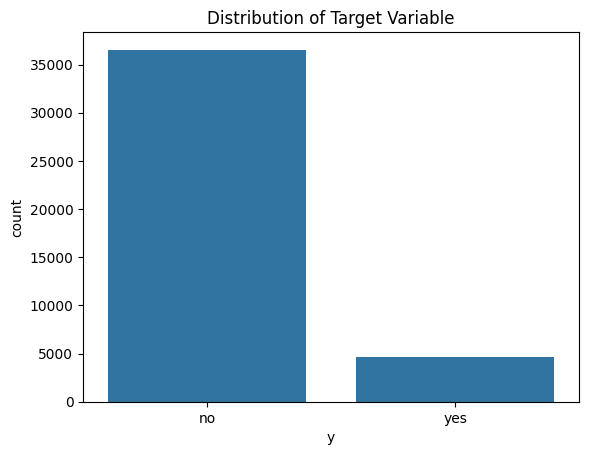

In [6]:


# Target variable distribution
print(data['y'].value_counts())

# Plot the target variable distribution
sns.countplot(data=data, x='y')
plt.title("Distribution of Target Variable")
plt.show()


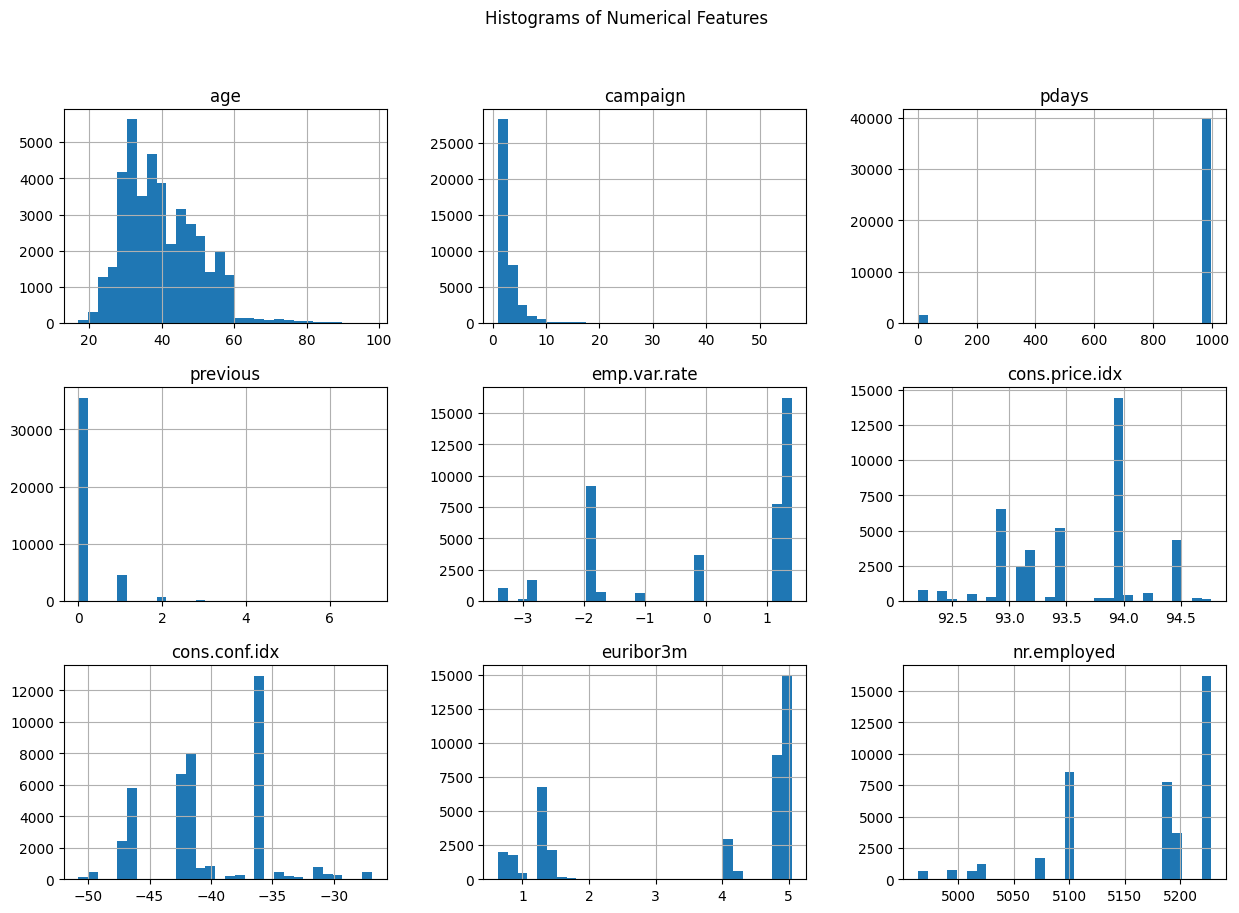

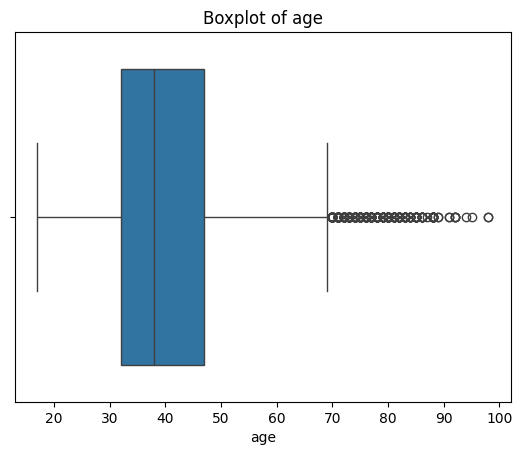

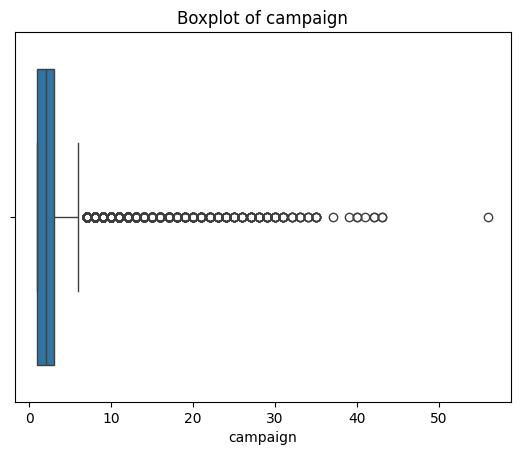

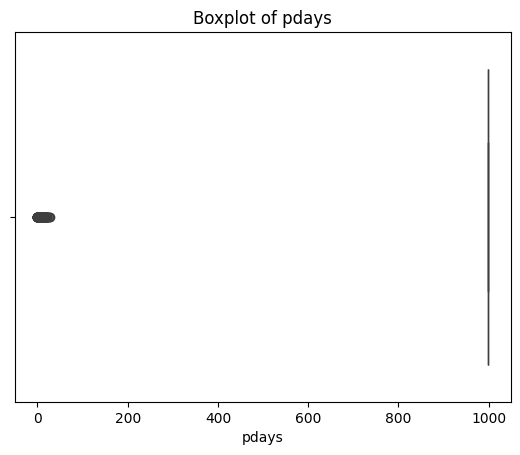

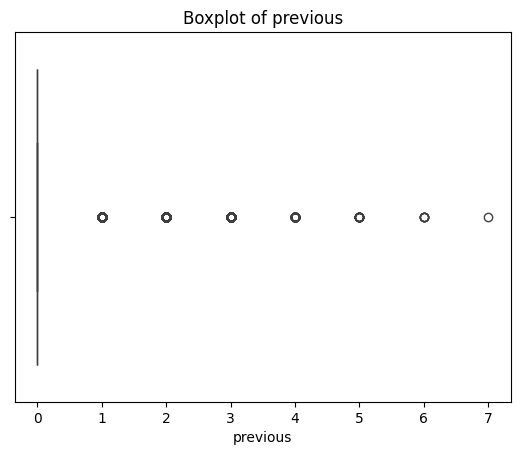

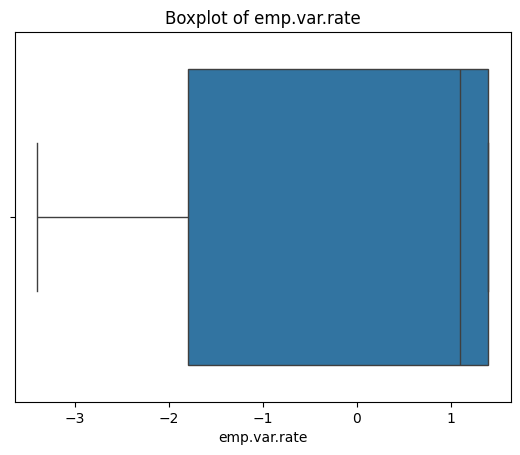

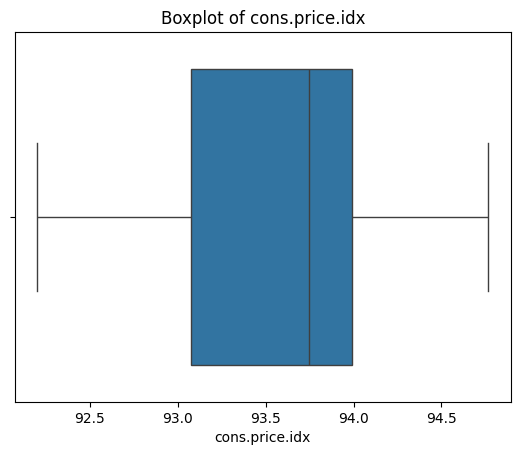

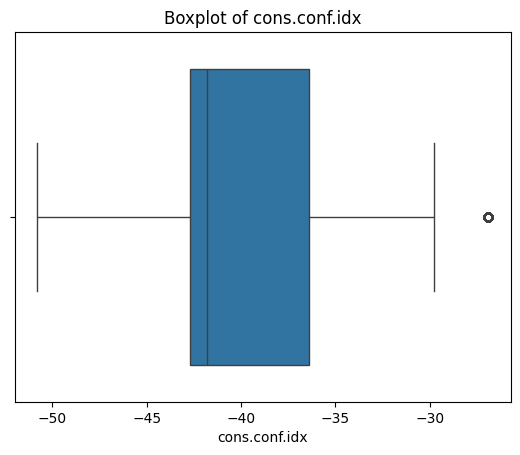

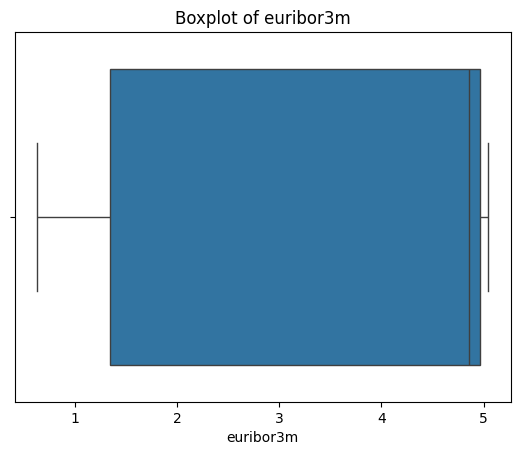

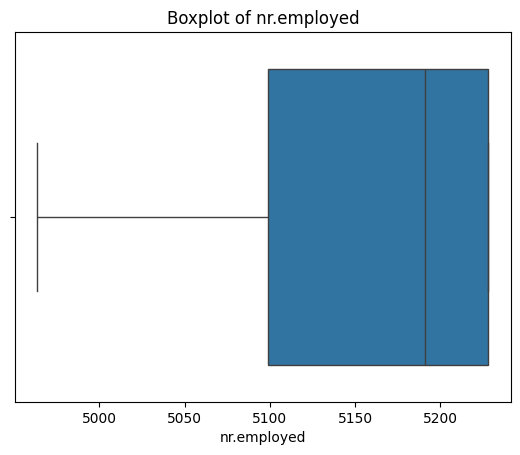

In [7]:
# List of numerical columns
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Histograms for numerical features
data[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots to detect outliers
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


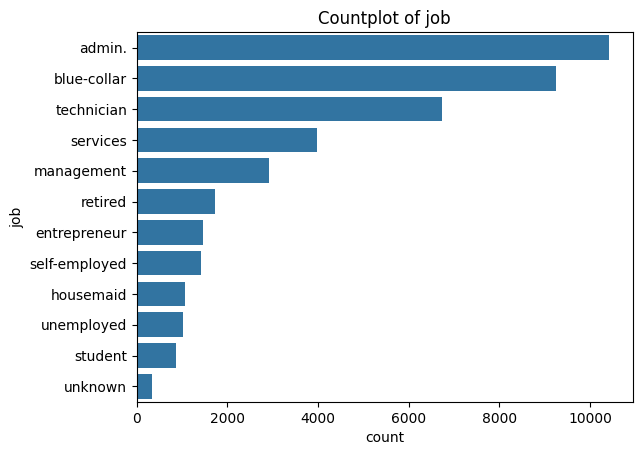

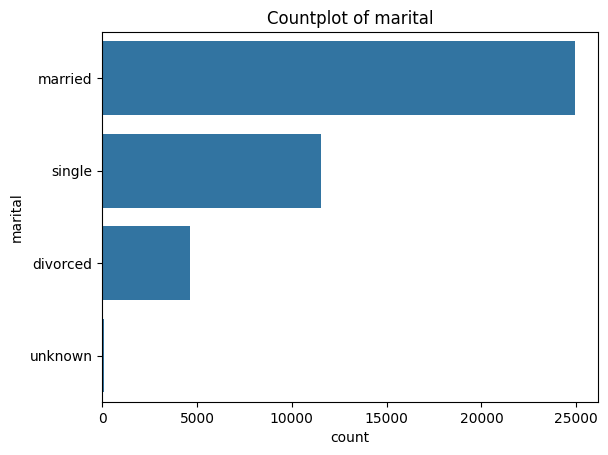

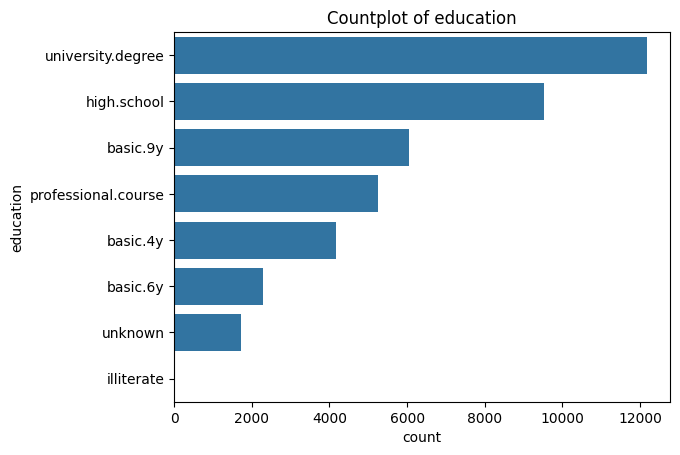

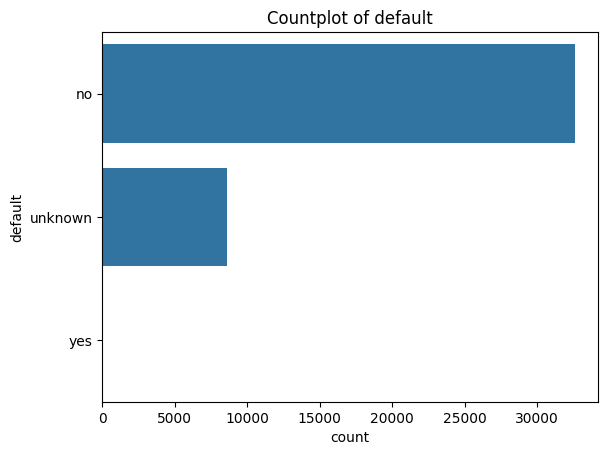

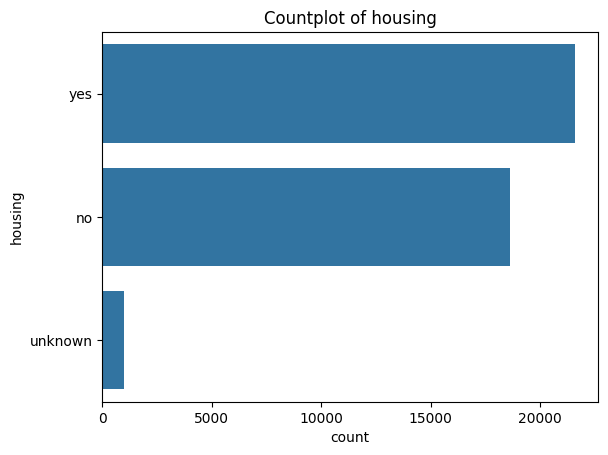

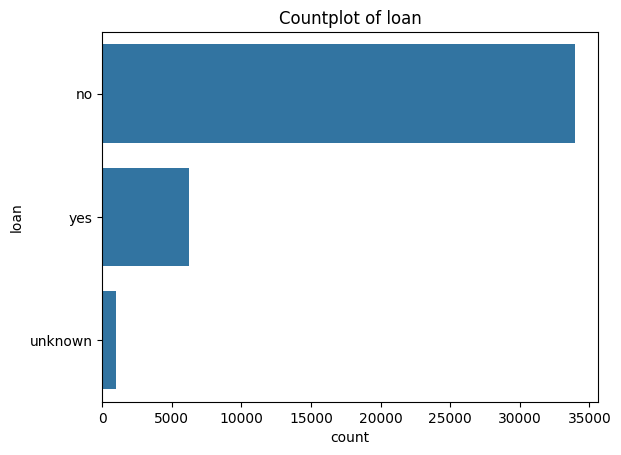

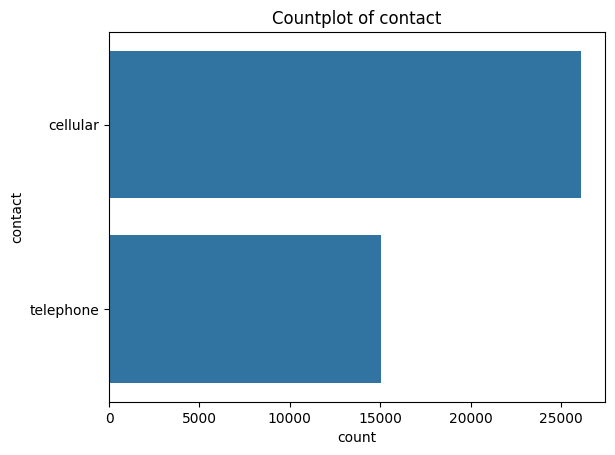

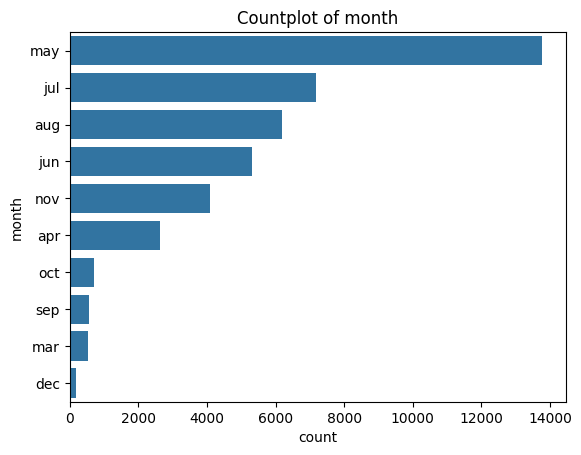

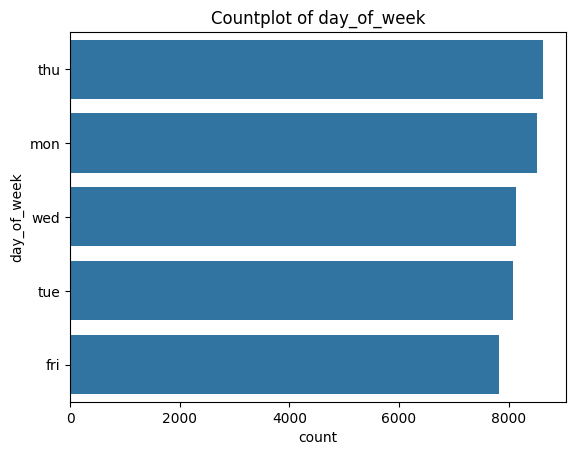

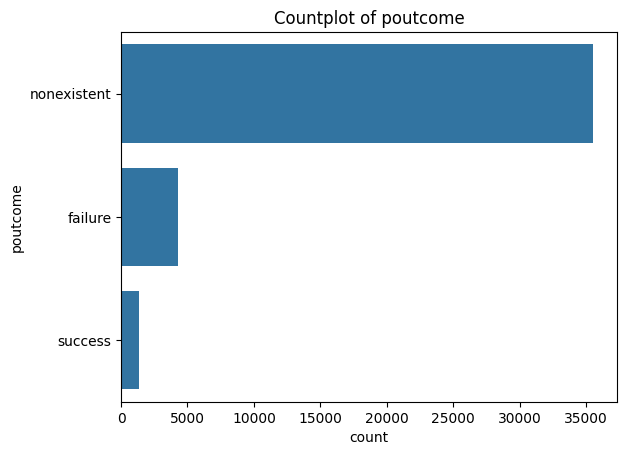

In [8]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Count plots for categorical features
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=data, y=col, order=data[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()


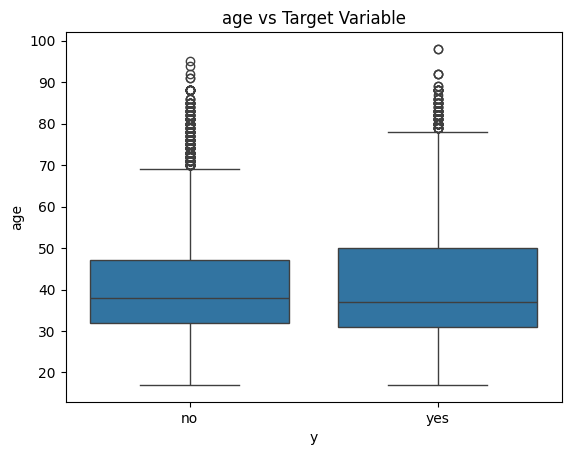

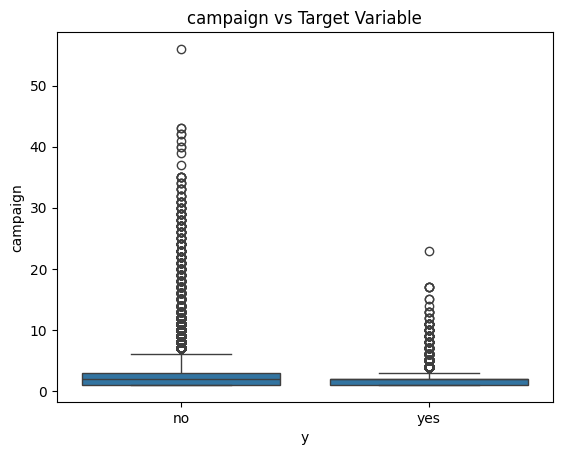

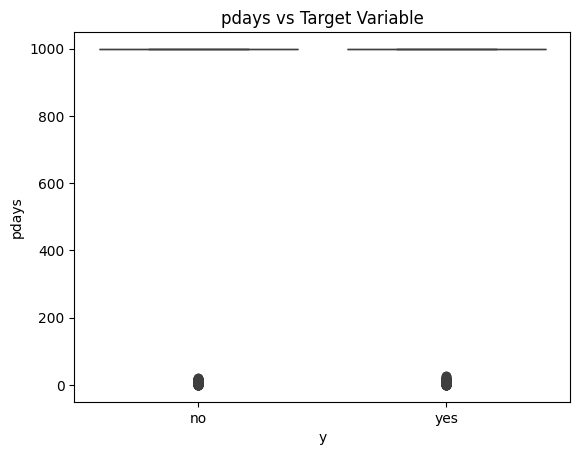

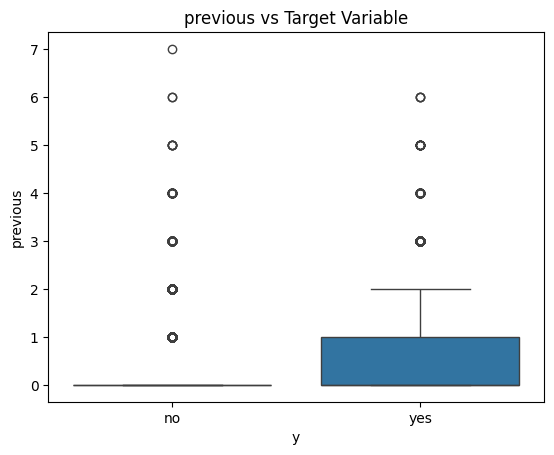

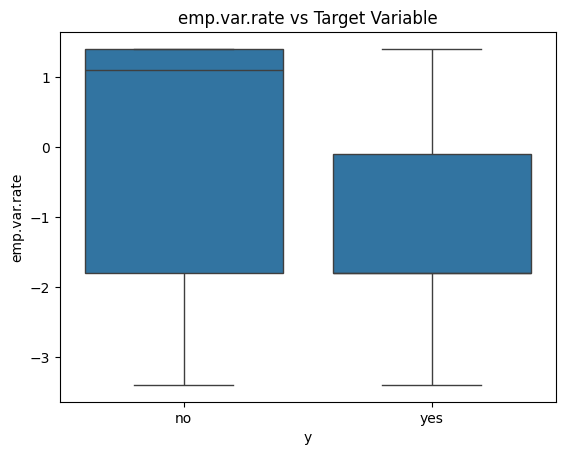

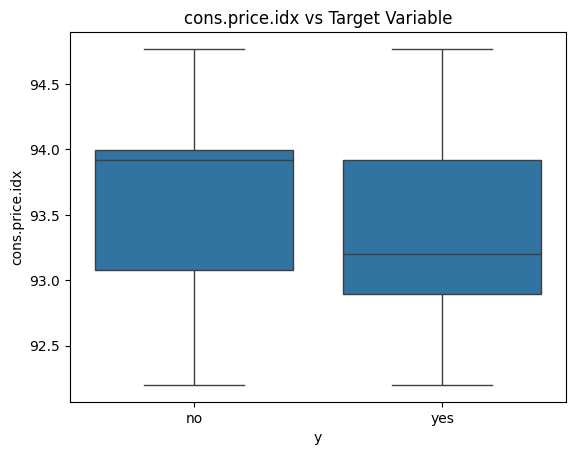

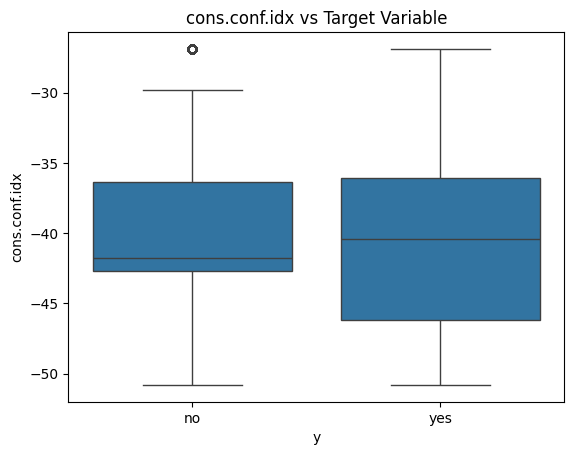

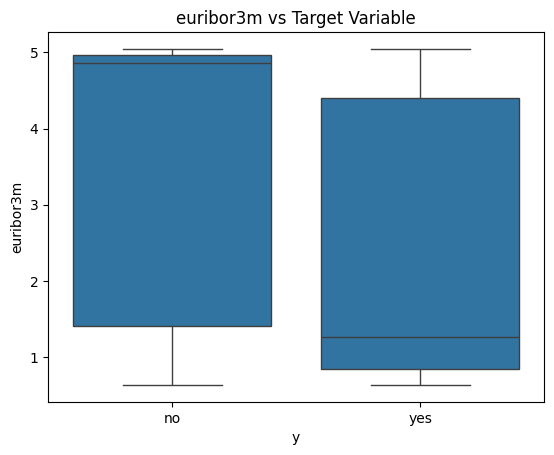

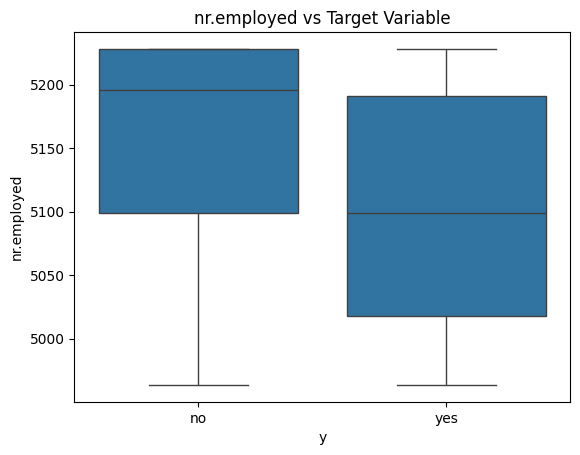

In [ ]:
# Boxplots for numerical features vs target
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=data, x='y', y=col)
    plt.title(f"{col} vs Target Variable")
    plt.show()


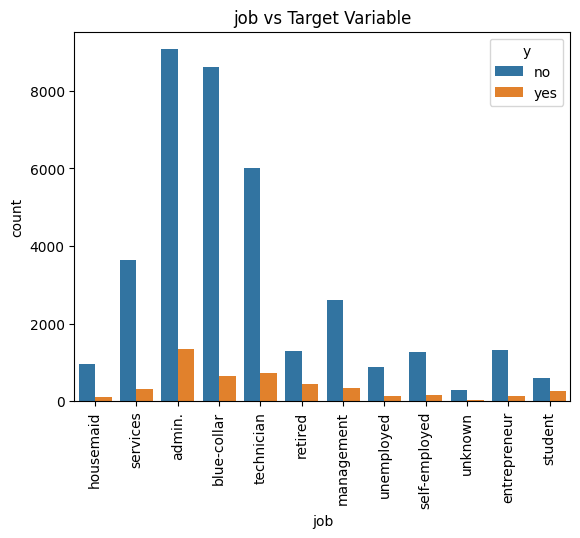

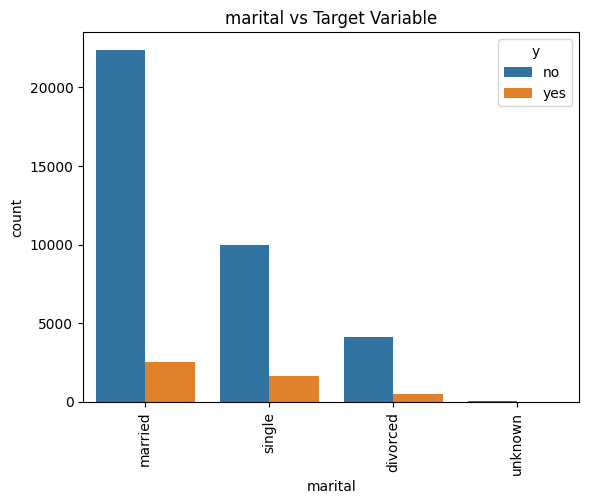

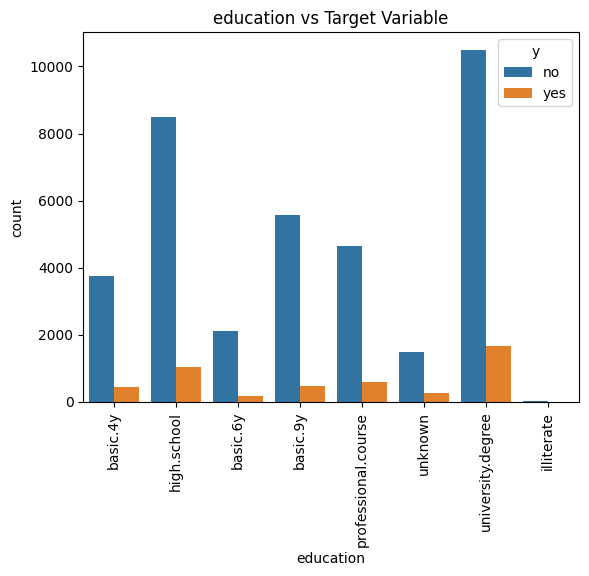

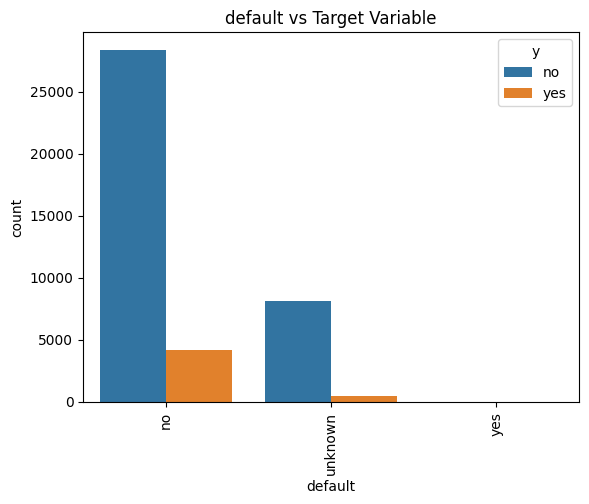

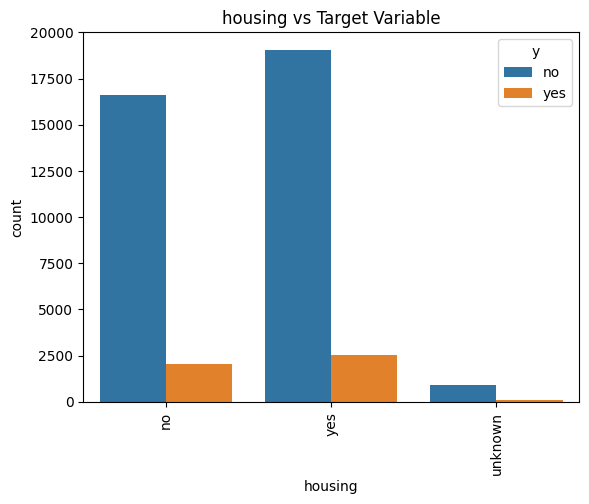

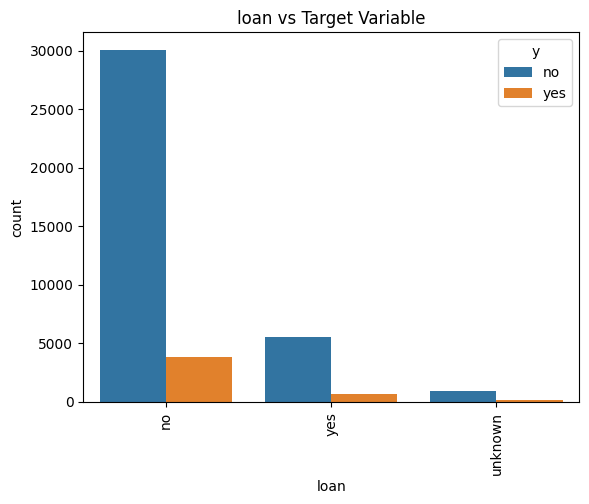

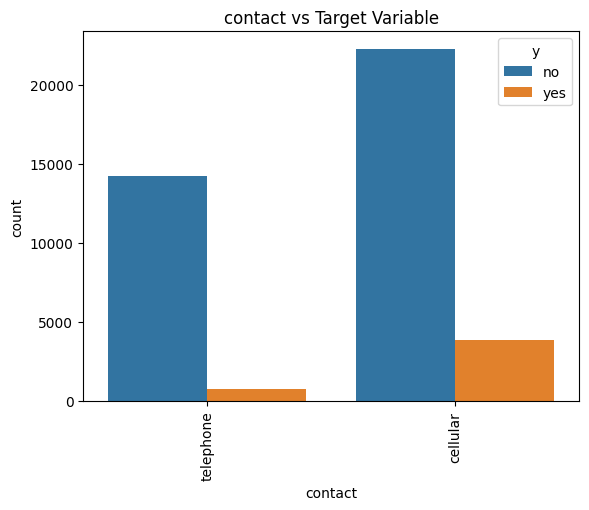

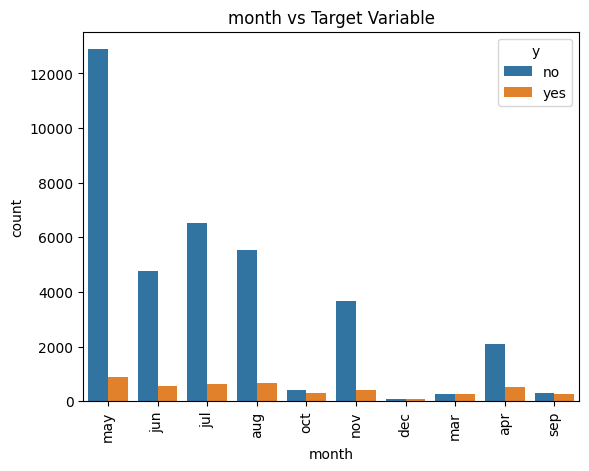

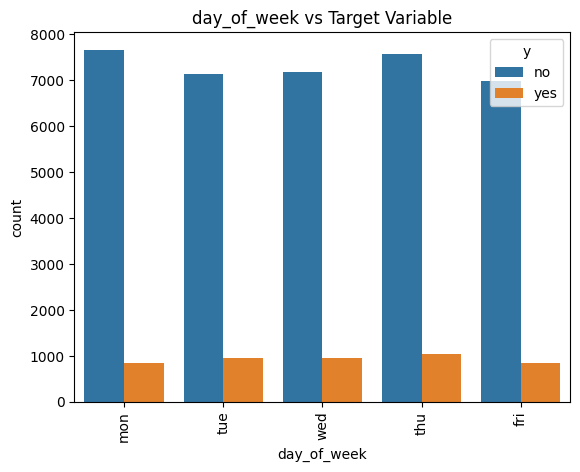

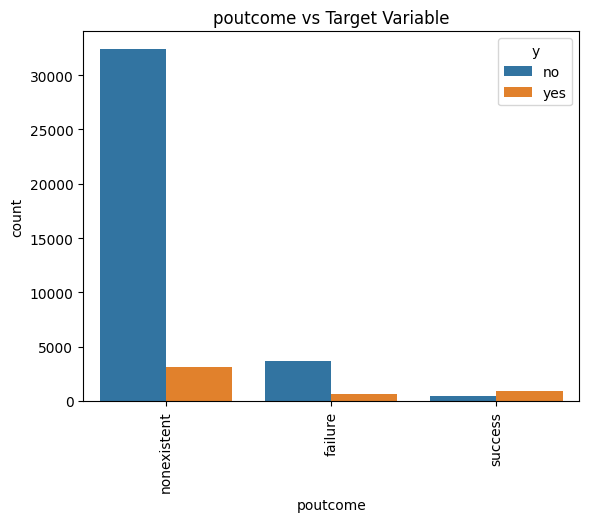

In [ ]:
# Bar plots for categorical features vs target
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=data, x=col, hue='y')
    plt.title(f"{col} vs Target Variable")
    plt.xticks(rotation=90)
    plt.show()


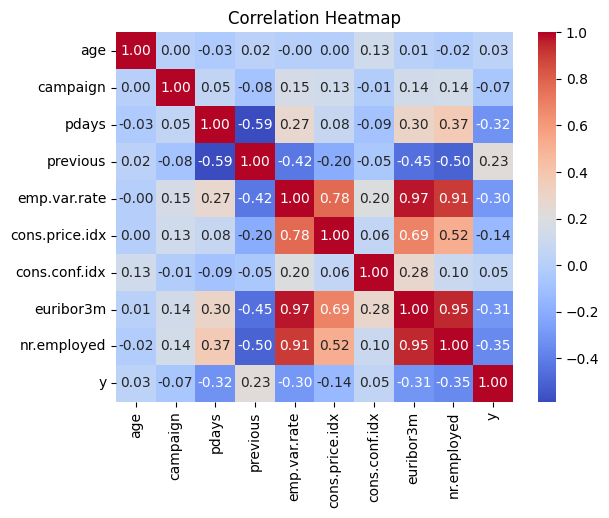

In [9]:

# Convert 'y' column to numerical (1 for 'yes', 0 for 'no')
data['y'] = data['y'].map({'yes': 1, 'no': 0})

corr_matrix = data[numerical_columns + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers_below = data[data['age'] < lower_bound].shape[0]
outliers_above = data[data['age'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

print(f"Age Outliers Below: {outliers_below}, Above: {outliers_above}, Total: {total_outliers}")
print(lower_bound)
print(upper_bound)


Age Outliers Below: 0, Above: 468, Total: 468
9.5
69.5


In [19]:
data[data['age'] > upper_bound]['age'].value_counts()

,count
age,
71,52
70,47
73,34
72,34
76,34
74,32
80,31
78,27
75,24


In [ ]:
# Capping outliers
# data['age'] = data['age'].clip(lower=lower_bound, upper=upper_bound)

In [20]:
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers_below = data[data['campaign'] < lower_bound].shape[0]
outliers_above = data[data['campaign'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

print(f"Campaign Outliers Below: {outliers_below}, Above: {outliers_above}, Total: {total_outliers}")
print(lower_bound)
print(upper_bound)

Campaign Outliers Below: 0, Above: 2406, Total: 2406
-2.0
6.0


In [21]:
data[data['campaign'] > upper_bound]['campaign'].value_counts()

,count
campaign,
7,629
8,400
9,283
10,225
11,177
12,125
13,92
14,69
17,58


In [22]:
Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers_below = data[data['cons.conf.idx'] < lower_bound].shape[0]
outliers_above = data[data['cons.conf.idx'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

print(f"cons.conf.idx Outliers Below: {outliers_below}, Above: {outliers_above}, Total: {total_outliers}")
print(lower_bound)
print(upper_bound)

cons.conf.idx Outliers Below: 0, Above: 446, Total: 446
-52.150000000000006
-26.949999999999992


In [23]:
data[data['cons.conf.idx'] > upper_bound]['cons.conf.idx'].value_counts()

,count
cons.conf.idx,
-26.9,446


In [11]:
data = data.drop(columns=['duration'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [12]:
# Define the job groupings
job_mapping = {
    'management': 'high_end',
    'entrepreneur': 'high_end',
    'self-employed': 'high_end',
    'admin.': 'technical',
    'blue-collar': 'technical',
    'technician': 'technical',
    'services': 'service',
    'housemaid': 'service',
    'student': 'Non_working',
    'retired': 'Non_working',
    'unemployed': 'Non_working',
    'unknown': 'unknown'
}

# Apply the mapping
data['job_grouped'] = data['job'].map(job_mapping)

In [13]:
data.drop(columns=['job'], inplace=True)
data.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped
0,56,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service
1,57,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service
2,37,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service
3,40,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical
4,56,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service


In [14]:
# Define the marital groupings
marital_mapping = {
    'married': 'married',
    'single': 'unmarried',
    'divorced': 'unmarried',
    'unknown': 'unknown'
}

# Apply the mapping to the dataset
data['marital_grouped'] = data['marital'].map(marital_mapping)

In [15]:
data.drop(columns=['marital'], inplace=True)
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped,marital_grouped
0,56,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married
1,57,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married
2,37,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married
3,40,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical,married
4,56,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married


In [16]:
# Mapping for education groups
education_mapping = {
    'illiterate': 'Basic Education',
    'basic.4y': 'Basic Education',
    'basic.6y': 'Basic Education',
    'basic.9y': 'Basic Education',
    'high.school': 'Secondary Education',
    'university.degree': 'Higher Education',
    'professional.course': 'Higher Education',
    'unknown': 'Unknown'
}

# Apply the mapping to the 'education' column
data['education_grouped'] = data['education'].map(education_mapping)

data.head()


,age,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped,marital_grouped,education_grouped
0,56,basic.4y,no,no,no,telephone,may,mon,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Basic Education
1,57,high.school,unknown,no,no,telephone,may,mon,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education
2,37,high.school,no,yes,no,telephone,may,mon,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education
3,40,basic.6y,no,no,no,telephone,may,mon,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical,married,Basic Education
4,56,high.school,no,no,yes,telephone,may,mon,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education


In [17]:
data.drop(columns=['education'], inplace=True)
data.head()

,age,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped,marital_grouped,education_grouped
0,56,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Basic Education
1,57,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education
2,37,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education
3,40,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical,married,Basic Education
4,56,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education


In [18]:
# Mapping for months into quarters
month_quarter_mapping = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

# Apply the mapping to the 'month' column
data['month_grouped'] = data['month'].map(month_quarter_mapping)

data.drop(columns=['month'], inplace=True)

data.head()

,age,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped,marital_grouped,education_grouped,month_grouped
0,56,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Basic Education,Q2
1,57,unknown,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2
2,37,no,yes,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2
3,40,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical,married,Basic Education,Q2
4,56,no,no,yes,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2


In [19]:
data.day_of_week.value_counts()

,count
day_of_week,
thu,8618
mon,8512
wed,8134
tue,8086
fri,7826


In [20]:
# Combine 'pdays' and 'previous' into a new feature 'contact_recency_frequency'
data['contact_recency_frequency'] = data['previous'] / (data['pdays'] + 1)  # Adding 1 to avoid division by zero

# Drop the 'pdays', 'previous', and 'previous contacted' columns
data.drop(columns=['pdays', 'previous'], inplace=True)
data.head()

,age,default,housing,loan,contact,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_grouped,marital_grouped,education_grouped,month_grouped,contact_recency_frequency
0,56,no,no,no,telephone,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Basic Education,Q2,0.0
1,57,unknown,no,no,telephone,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2,0.0
2,37,no,yes,no,telephone,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2,0.0
3,40,no,no,no,telephone,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technical,married,Basic Education,Q2,0.0
4,56,no,no,yes,telephone,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,service,married,Secondary Education,Q2,0.0


In [21]:
data.isnull().sum()

,0
age,0
default,0
housing,0
loan,0
contact,0
day_of_week,0
campaign,0
poutcome,0
emp.var.rate,0
cons.price.idx,0


In [22]:
# List of categorical columns to apply one-hot encoding to
categorical_columns = ['job_grouped', 'marital_grouped', 'education_grouped', 'housing','default', 'loan', 'contact', 'month_grouped', 'day_of_week', 'poutcome']

# Apply one-hot encoding to the specified columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the resulting DataFrame
data_encoded.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_recency_frequency,job_grouped_high_end,...,contact_telephone,month_grouped_Q2,month_grouped_Q3,month_grouped_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,False,...,True,True,False,False,True,False,False,False,True,False
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,False,...,True,True,False,False,True,False,False,False,True,False
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,False,...,True,True,False,False,True,False,False,False,True,False
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,False,...,True,True,False,False,True,False,False,False,True,False
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,False,...,True,True,False,False,True,False,False,False,True,False


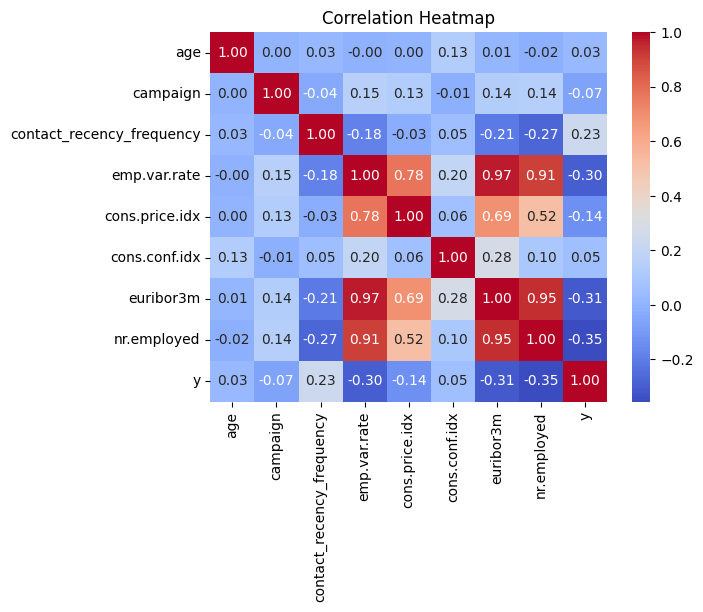

In [23]:
numerical_columns = ['age', 'campaign', 'contact_recency_frequency', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

corr_matrix = data[numerical_columns + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Compute the arithmetic mean
data_encoded['combined_feature'] = data_encoded[['euribor3m', 'nr.employed', 'emp.var.rate']].mean(axis=1)

In [25]:
data_encoded.drop(columns=['euribor3m', 'nr.employed', 'emp.var.rate'], inplace=True)
data_encoded.head()

,age,campaign,cons.price.idx,cons.conf.idx,y,contact_recency_frequency,job_grouped_high_end,job_grouped_service,job_grouped_technical,job_grouped_unknown,...,month_grouped_Q2,month_grouped_Q3,month_grouped_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,combined_feature
0,56,1,93.994,-36.4,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,1732.319
1,57,1,93.994,-36.4,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,1732.319
2,37,1,93.994,-36.4,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,1732.319
3,40,1,93.994,-36.4,0,0.0,False,False,True,False,...,True,False,False,True,False,False,False,True,False,1732.319
4,56,1,93.994,-36.4,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,1732.319


In [ ]:
final_dataseto = data_encoded.copy()
final_dataseto.to_csv('/content/drive/MyDrive/Colab Notebooks/MLcw/final_dataseto.csv')

In [42]:
# Columns to scale
numerical_columns_new = ['age', 'campaign','contact_recency_frequency','cons.price.idx', 'cons.conf.idx','combined_feature']

scaler = StandardScaler()
data_encoded[numerical_columns_new] = scaler.fit_transform(data_encoded[numerical_columns_new])

In [26]:
# Columns to scale
numerical_columns_new = ['age', 'campaign', 'contact_recency_frequency',
                         'cons.price.idx', 'cons.conf.idx', 'combined_feature']

# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the selected columns
data_encoded[numerical_columns_new] = scaler.fit_transform(data_encoded[numerical_columns_new])

In [27]:
data_encoded.head()

,age,campaign,cons.price.idx,cons.conf.idx,y,contact_recency_frequency,job_grouped_high_end,job_grouped_service,job_grouped_technical,job_grouped_unknown,...,month_grouped_Q2,month_grouped_Q3,month_grouped_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,combined_feature
0,1.200000,-0.5,0.266594,0.857143,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,-0.000022
1,1.266667,-0.5,0.266594,0.857143,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,-0.000022
2,-0.066667,-0.5,0.266594,0.857143,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,-0.000022
3,0.133333,-0.5,0.266594,0.857143,0,0.0,False,False,True,False,...,True,False,False,True,False,False,False,True,False,-0.000022
4,1.200000,-0.5,0.266594,0.857143,0,0.0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,-0.000022


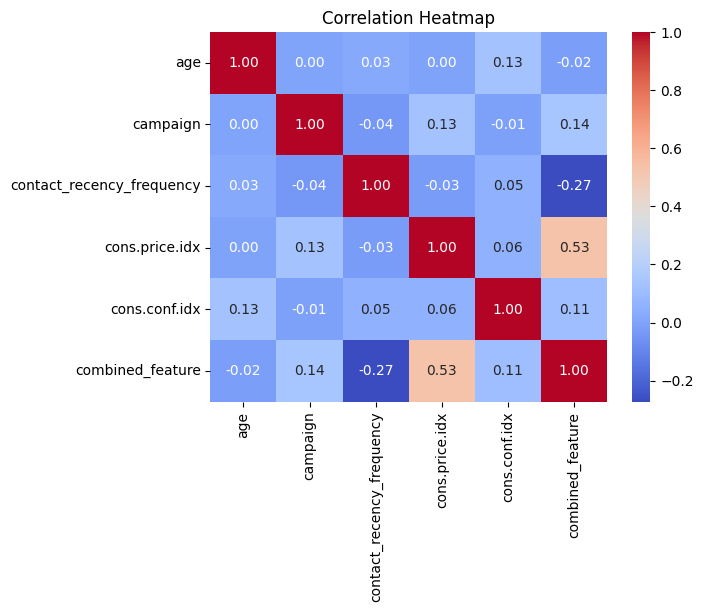

In [28]:
corr_matrix = data_encoded[numerical_columns_new ].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [29]:

# Select categorical columns
categorical_cols = data_encoded.select_dtypes(include=['bool']).columns

# Calculate MI scores
mi_scores = mutual_info_classif(data_encoded[categorical_cols], data_encoded['y'], discrete_features=True, random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': categorical_cols, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the scores
print(mi_df)


                                  Feature      MI Score
24                       poutcome_success  2.898484e-02
23                   poutcome_nonexistent  1.500422e-02
15                      contact_telephone  1.164555e-02
11                        default_unknown  5.765532e-03
16                       month_grouped_Q2  2.531398e-03
18                       month_grouped_Q4  1.654350e-03
6      education_grouped_Higher Education  1.101109e-03
5               marital_grouped_unmarried  9.143502e-04
2                   job_grouped_technical  8.294616e-04
1                     job_grouped_service  5.554894e-04
19                        day_of_week_mon  2.316539e-04
8               education_grouped_Unknown  2.144617e-04
20                        day_of_week_thu  9.370918e-05
10                            housing_yes  6.974630e-05
0                    job_grouped_high_end  6.869700e-05
21                        day_of_week_tue  3.266212e-05
7   education_grouped_Secondary Education  2.765

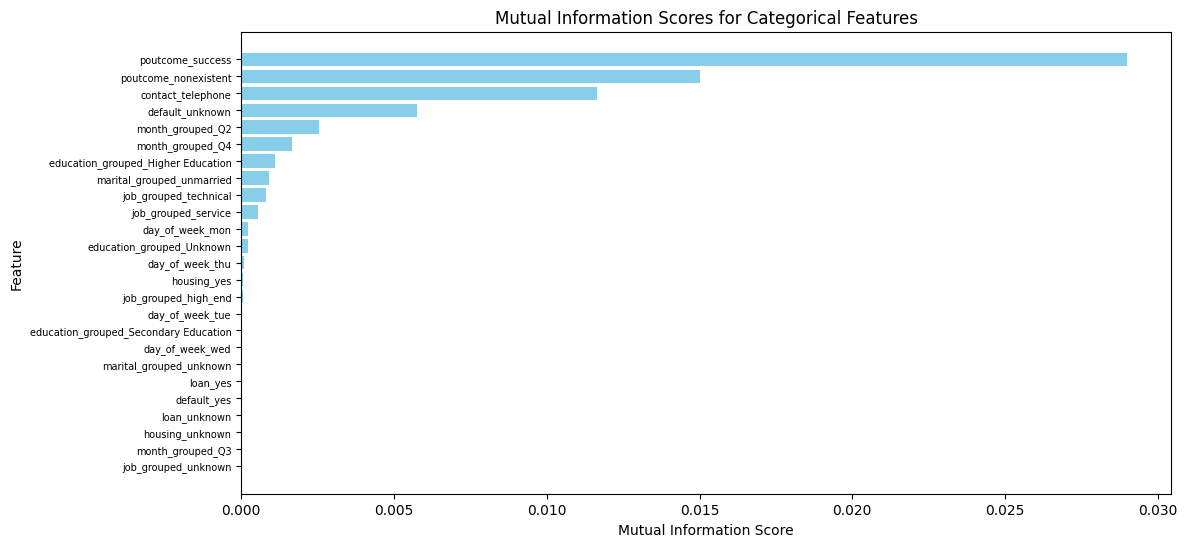

In [46]:
# Plot MI scores
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores for Categorical Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.tick_params(axis='y', labelsize=7)  # Added line to reduce y-axis tick label size
plt.show()

In [ ]:
#  Define features and target
X = data_encoded.drop(columns=['y'])  # Features
y = data_encoded['y']                # Target variable

#  Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'rf__n_estimators': [50, 100, 150, 200],  # Include fewer trees for simplicity
    'rf__max_depth': [10, 20, None],         # Add intermediate depths
    'rf__min_samples_split': [2, 5, 10],     # Try higher splits to regularize
    'rf__min_samples_leaf': [1, 2, 4, 6],    # Test larger leaf sizes
    'rf__max_features': ['sqrt', 'log2']     # Keep features simplified
}

#  Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE within the pipeline
    ('rf', rf_model)                   # Random Forest as the estimator
])

#  Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',                      # Use F1 score for imbalanced datasets
    cv=cv,
    n_jobs=-1,
    verbose=2                          # Set verbose level to 2 for progress tracking
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)  # No need for manual SMOTE here

#  Retrieve best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

#  Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)  # Predictions on original training data

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 36000 candidates, totalling 108000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [30]:
#  Define features and target
X = data_encoded.drop(columns=['y'])  # Features
y = data_encoded['y']                # Target variable

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class on the training data only
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Train the Random Forest Classifier with the best hyperparameters
rf_model_tuned = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200
)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model_tuned, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")

# Fit the model on the entire resampled training set
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = rf_model_tuned.predict(X_train_resampled)

# Predictions on test set
y_test_pred = rf_model_tuned.predict(X_test)

#  Accuracy for training and test datasets
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-Validation Scores: [0.79865116 0.80138794 0.80654936 0.78768328 0.7914956 ]
Mean Cross-Validation Accuracy: 0.80
Training Accuracy: 0.80
Test Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10961
           1       0.45      0.60      0.51      1392

    accuracy                           0.87     12353
   macro avg       0.70      0.75      0.72     12353
weighted avg       0.89      0.87      0.88     12353



In [31]:
print(classification_report(y_train_resampled, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     25576
           1       0.89      0.69      0.78     25576

    accuracy                           0.80     51152
   macro avg       0.82      0.80      0.80     51152
weighted avg       0.82      0.80      0.80     51152

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10961
           1       0.45      0.60      0.51      1392

    accuracy                           0.87     12353
   macro avg       0.70      0.75      0.72     12353
weighted avg       0.89      0.87      0.88     12353



In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[9938, 1023],
       [ 559,  833]])

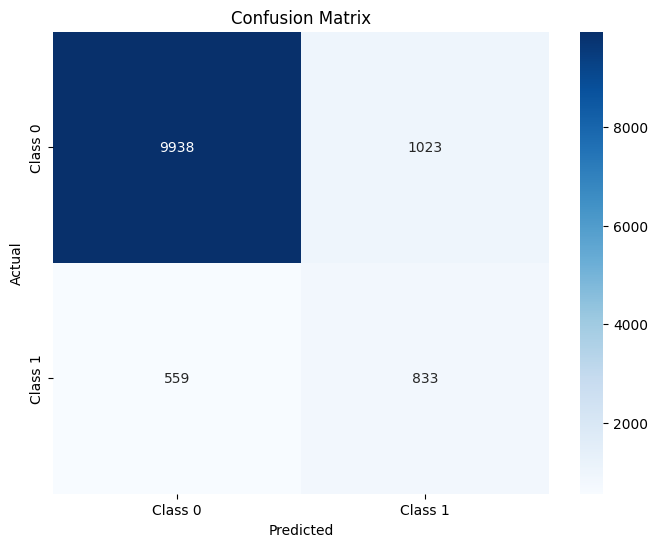

In [33]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:

#Get predicted probabilities instead of class predictions
y_val_pred_probs = rf_model_tuned.predict_proba(X_test)[:, 1]  # Getting probabilities for class 1
y_train_res_pred_probs = rf_model_tuned.predict_proba(X_train_resampled)[:, 1]

# Test thresholds in the range [0.30, 0.70]
thresholds = [i * 0.01 for i in range(30, 70)]

# Calculate F1 scores for each threshold
f1_scores = [f1_score(y_test, (y_val_pred_probs > t).astype(int)) for t in thresholds]

# Find the threshold that gives the highest F1 score
optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.56


In [39]:
# Apply optimal threshold to get final predictions
y_test_pred_optimal = (y_val_pred_probs > optimal_threshold).astype(int)
y_train_pred_optimal = (y_train_res_pred_probs > optimal_threshold).astype(int)
# View the confusion matrix and classification report


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_optimal))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_optimal))
print(classification_report(y_train_resampled, y_train_pred))


Confusion Matrix:
[[10100   861]
 [  607   785]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10961
           1       0.48      0.56      0.52      1392

    accuracy                           0.88     12353
   macro avg       0.71      0.74      0.72     12353
weighted avg       0.89      0.88      0.89     12353

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     25576
           1       0.89      0.69      0.78     25576

    accuracy                           0.80     51152
   macro avg       0.82      0.80      0.80     51152
weighted avg       0.82      0.80      0.80     51152



ROC-AUC Score: 0.75


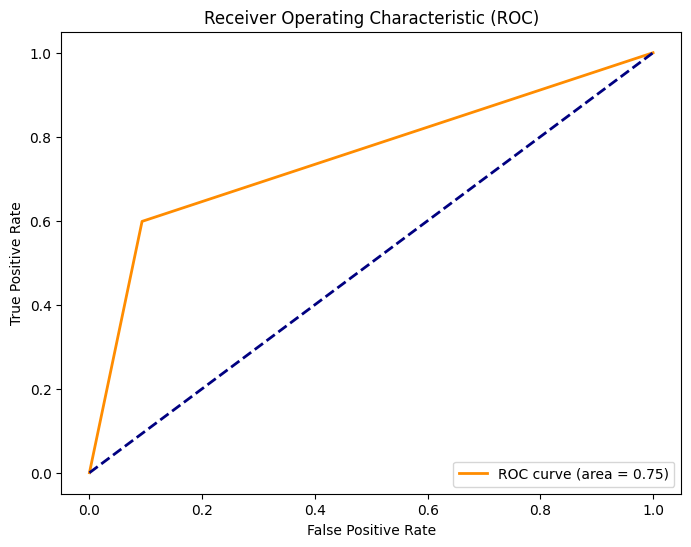

PR-AUC Score: 0.55


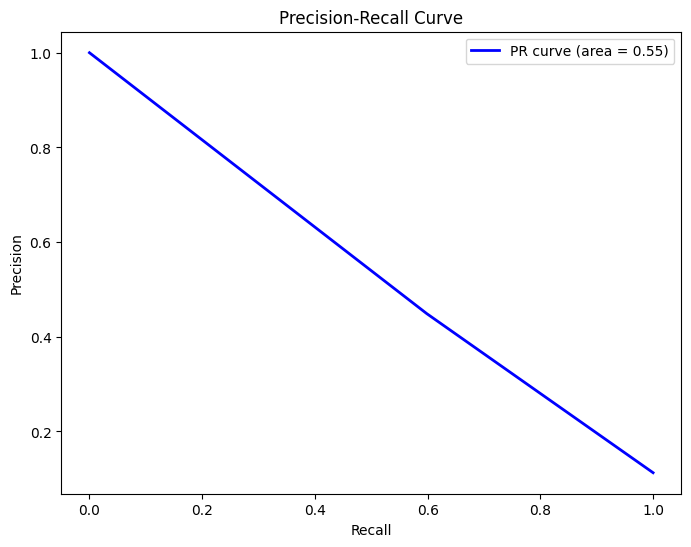

In [34]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc:.2f}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [35]:

# Extract the values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Class-wise accuracy calculation
accuracy_0 = tp / (tp + fn)  # Accuracy for class 0
accuracy_1 = tn / (tn + fp)  # Accuracy for class 1

print(f"Class 0 Accuracy: {accuracy_0:.4f}")
print(f"Class 1 Accuracy: {accuracy_1:.4f}")

Class 0 Accuracy: 0.5984
Class 1 Accuracy: 0.9067


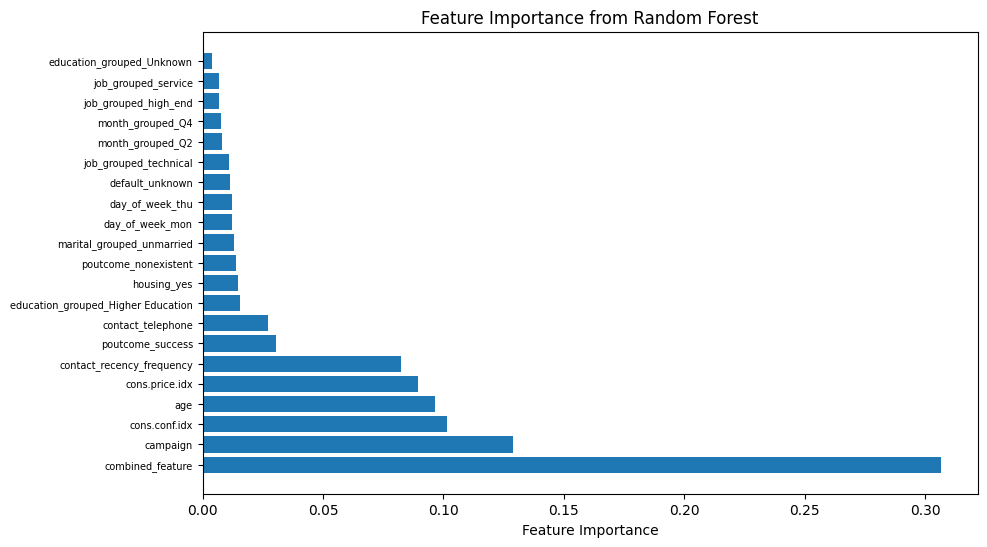

In [ ]:
# Get the feature importances from the trained Random Forest model
feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame to display features and their importance

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tick_params(axis='y', labelsize=7)
plt.show()
